In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# adata = sc.read_h5ad(r"C:\Users\evanlee\Documents\Research_datasets\GSE164378\Hao_PBMC_GSE164378.h5ad")
adata = sc.read_h5ad('/Users/evanli/Documents/Research_datasets/PBMC_Hao/GSE164378_Hao/Hao_PBMC_GSE164378.h5ad')
print('Original adata:', adata.shape)

adata.obs['celltype.l2'] = adata.obs['celltype.l2'].str.replace(' ', '_')
label = adata.obs['celltype.l2'].tolist()
types = np.unique(label).tolist()
print('all cell types:', types)
print('====================')


Original adata: (161764, 33538)
all cell types: ['ASDC', 'B_intermediate', 'B_memory', 'B_naive', 'CD14_Mono', 'CD16_Mono', 'CD4_CTL', 'CD4_Naive', 'CD4_Proliferating', 'CD4_TCM', 'CD4_TEM', 'CD8_Naive', 'CD8_Proliferating', 'CD8_TCM', 'CD8_TEM', 'Doublet', 'Eryth', 'HSPC', 'ILC', 'MAIT', 'NK', 'NK_CD56bright', 'NK_Proliferating', 'Plasmablast', 'Platelet', 'Treg', 'cDC1', 'cDC2', 'dnT', 'gdT', 'pDC']


In [3]:
adata.obs.head()

,celltype.l1,celltype.l2,celltype.l3,Phase,Batch,donor,nCount_ADT,nFeature_ADT,nCount_RNA,nFeature_RNA
L1_AAACCCAAGAAACTCA,Mono,CD14_Mono,CD14 Mono,G1,Batch1,P2,7535,217,10823,2915
L1_AAACCCAAGACATACA,CD4 T,CD4_TCM,CD4 TCM_1,G1,Batch1,P1,6013,209,5864,1617
L1_AAACCCACAACTGGTT,CD8 T,CD8_Naive,CD8 Naive,S,Batch1,P4,6620,213,5067,1381
L1_AAACCCACACGTACTA,NK,NK,NK_2,G1,Batch1,P3,3567,202,4786,1890
L1_AAACCCACAGCATACT,CD8 T,CD8_Naive,CD8 Naive,G1,Batch1,P4,6402,215,6505,1621


## Read annotation result from SingleR

In [4]:
!ls

L1_confusion_matrix.ipynb     SingleR_Monaco_ref.r
L2_confusion_matrix.ipynb     SingleR_pred_label_fine.RData
Monaco_ref_celltypes.csv      SingleR_pred_label_main.RData
Pred_Hao_fine.csv             tutorial.r
Pred_Hao_main.csv


In [5]:
pred_fine = pd.read_csv('Pred_Hao_fine.csv', index_col=0)
pred_fine.head()

,scores.Central.memory.CD8.T.cells,scores.Classical.monocytes,scores.Effector.memory.CD8.T.cells,scores.Exhausted.B.cells,scores.Follicular.helper.T.cells,scores.Intermediate.monocytes,scores.Low.density.basophils,scores.Low.density.neutrophils,scores.MAIT.cells,scores.Myeloid.dendritic.cells,...,scores.Terminal.effector.CD4.T.cells,scores.Terminal.effector.CD8.T.cells,scores.Th1.cells,scores.Th1.Th17.cells,scores.Th17.cells,scores.Th2.cells,scores.Vd2.gd.T.cells,labels,delta.next,pruned.labels
L1_AAACCCAAGAAACTCA,0.169280,0.468753,0.182032,0.336036,0.171960,0.471952,0.276508,0.346225,0.189720,0.458593,...,0.207550,0.193306,0.176850,0.182160,0.177181,0.178443,0.190775,Intermediate monocytes,0.004020,Intermediate monocytes
L1_AAACCCAAGACATACA,0.278819,0.170649,0.267447,0.179650,0.288928,0.196887,0.170855,0.155235,0.265162,0.184158,...,0.270914,0.259385,0.290977,0.287014,0.286504,0.290113,0.275447,Th1 cells,0.002396,Th1 cells
L1_AAACCCACAACTGGTT,0.256563,0.121917,0.231854,0.161645,0.247101,0.155715,0.140325,0.113782,0.234736,0.138895,...,0.237286,0.236593,0.253066,0.244129,0.245973,0.247193,0.247433,Naive CD8 T cells,0.191474,Naive CD8 T cells
L1_AAACCCACACGTACTA,0.282987,0.213129,0.326833,0.229013,0.270288,0.289443,0.213961,0.218658,0.309691,0.235238,...,0.335747,0.346212,0.285985,0.286094,0.280295,0.263441,0.340899,Natural killer cells,0.090636,Natural killer cells
L1_AAACCCACAGCATACT,0.267494,0.157696,0.250521,0.178704,0.250346,0.179361,0.159129,0.151439,0.250303,0.164169,...,0.252883,0.242708,0.264434,0.250248,0.251548,0.259249,0.259010,Naive CD8 T cells,0.057999,Naive CD8 T cells


In [6]:
pred_types_fine = np.unique(pred_fine['labels']).tolist()
print(len(pred_types_fine))
pred_types_fine

29


['Central memory CD8 T cells',
 'Classical monocytes',
 'Effector memory CD8 T cells',
 'Exhausted B cells',
 'Follicular helper T cells',
 'Intermediate monocytes',
 'Low-density basophils',
 'Low-density neutrophils',
 'MAIT cells',
 'Myeloid dendritic cells',
 'Naive B cells',
 'Naive CD4 T cells',
 'Naive CD8 T cells',
 'Natural killer cells',
 'Non classical monocytes',
 'Non-Vd2 gd T cells',
 'Non-switched memory B cells',
 'Plasmablasts',
 'Plasmacytoid dendritic cells',
 'Progenitor cells',
 'Switched memory B cells',
 'T regulatory cells',
 'Terminal effector CD4 T cells',
 'Terminal effector CD8 T cells',
 'Th1 cells',
 'Th1/Th17 cells',
 'Th17 cells',
 'Th2 cells',
 'Vd2 gd T cells']

In [7]:
print(len(types))
types

31


['ASDC',
 'B_intermediate',
 'B_memory',
 'B_naive',
 'CD14_Mono',
 'CD16_Mono',
 'CD4_CTL',
 'CD4_Naive',
 'CD4_Proliferating',
 'CD4_TCM',
 'CD4_TEM',
 'CD8_Naive',
 'CD8_Proliferating',
 'CD8_TCM',
 'CD8_TEM',
 'Doublet',
 'Eryth',
 'HSPC',
 'ILC',
 'MAIT',
 'NK',
 'NK_CD56bright',
 'NK_Proliferating',
 'Plasmablast',
 'Platelet',
 'Treg',
 'cDC1',
 'cDC2',
 'dnT',
 'gdT',
 'pDC']

## Confusion matrix without type correspondence

In [37]:
# Get the true labels
true_labels = adata.obs['celltype.l2']

# Get the predicted labels
predicted_labels = pred_fine['labels']

# Create the confusion matrix
# cm = pd.crosstab(true_labels, predicted_labels, rownames=['True'], colnames=['Predicted'], margins=False)
cm = pd.crosstab(true_labels, predicted_labels, margins=False)

In [28]:
cm

labels,Central memory CD8 T cells,Classical monocytes,Effector memory CD8 T cells,Exhausted B cells,Follicular helper T cells,Intermediate monocytes,Low-density basophils,Low-density neutrophils,MAIT cells,Myeloid dendritic cells,...,Progenitor cells,Switched memory B cells,T regulatory cells,Terminal effector CD4 T cells,Terminal effector CD8 T cells,Th1 cells,Th1/Th17 cells,Th17 cells,Th2 cells,Vd2 gd T cells
celltype.l2,,,,,,,,,,,,,,,,,,,,,
ASDC,0,0,0,0,0,0,0,0,0,29,...,0,0,0,0,0,0,0,0,0,0
B_intermediate,0,1,0,158,0,0,0,0,0,2,...,0,164,1,0,0,0,0,0,0,0
B_memory,0,1,0,525,0,1,0,0,0,0,...,0,2134,0,0,0,0,0,0,0,3
B_naive,0,3,0,90,0,1,0,0,0,1,...,1,26,0,0,0,0,0,0,0,0
CD14_Mono,0,39783,0,0,0,2353,0,1,0,550,...,0,0,0,0,0,0,0,0,0,0
CD16_Mono,0,48,0,0,0,3725,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
CD4_CTL,0,0,42,0,0,2,0,0,14,0,...,0,0,0,979,59,0,2,0,0,369
CD4_Naive,112,0,0,0,351,6,0,0,0,0,...,0,0,919,5,0,1534,32,47,314,83
CD4_Proliferating,4,1,4,0,7,1,0,0,1,0,...,0,0,35,1,0,32,0,2,0,11


### Plot heatmap

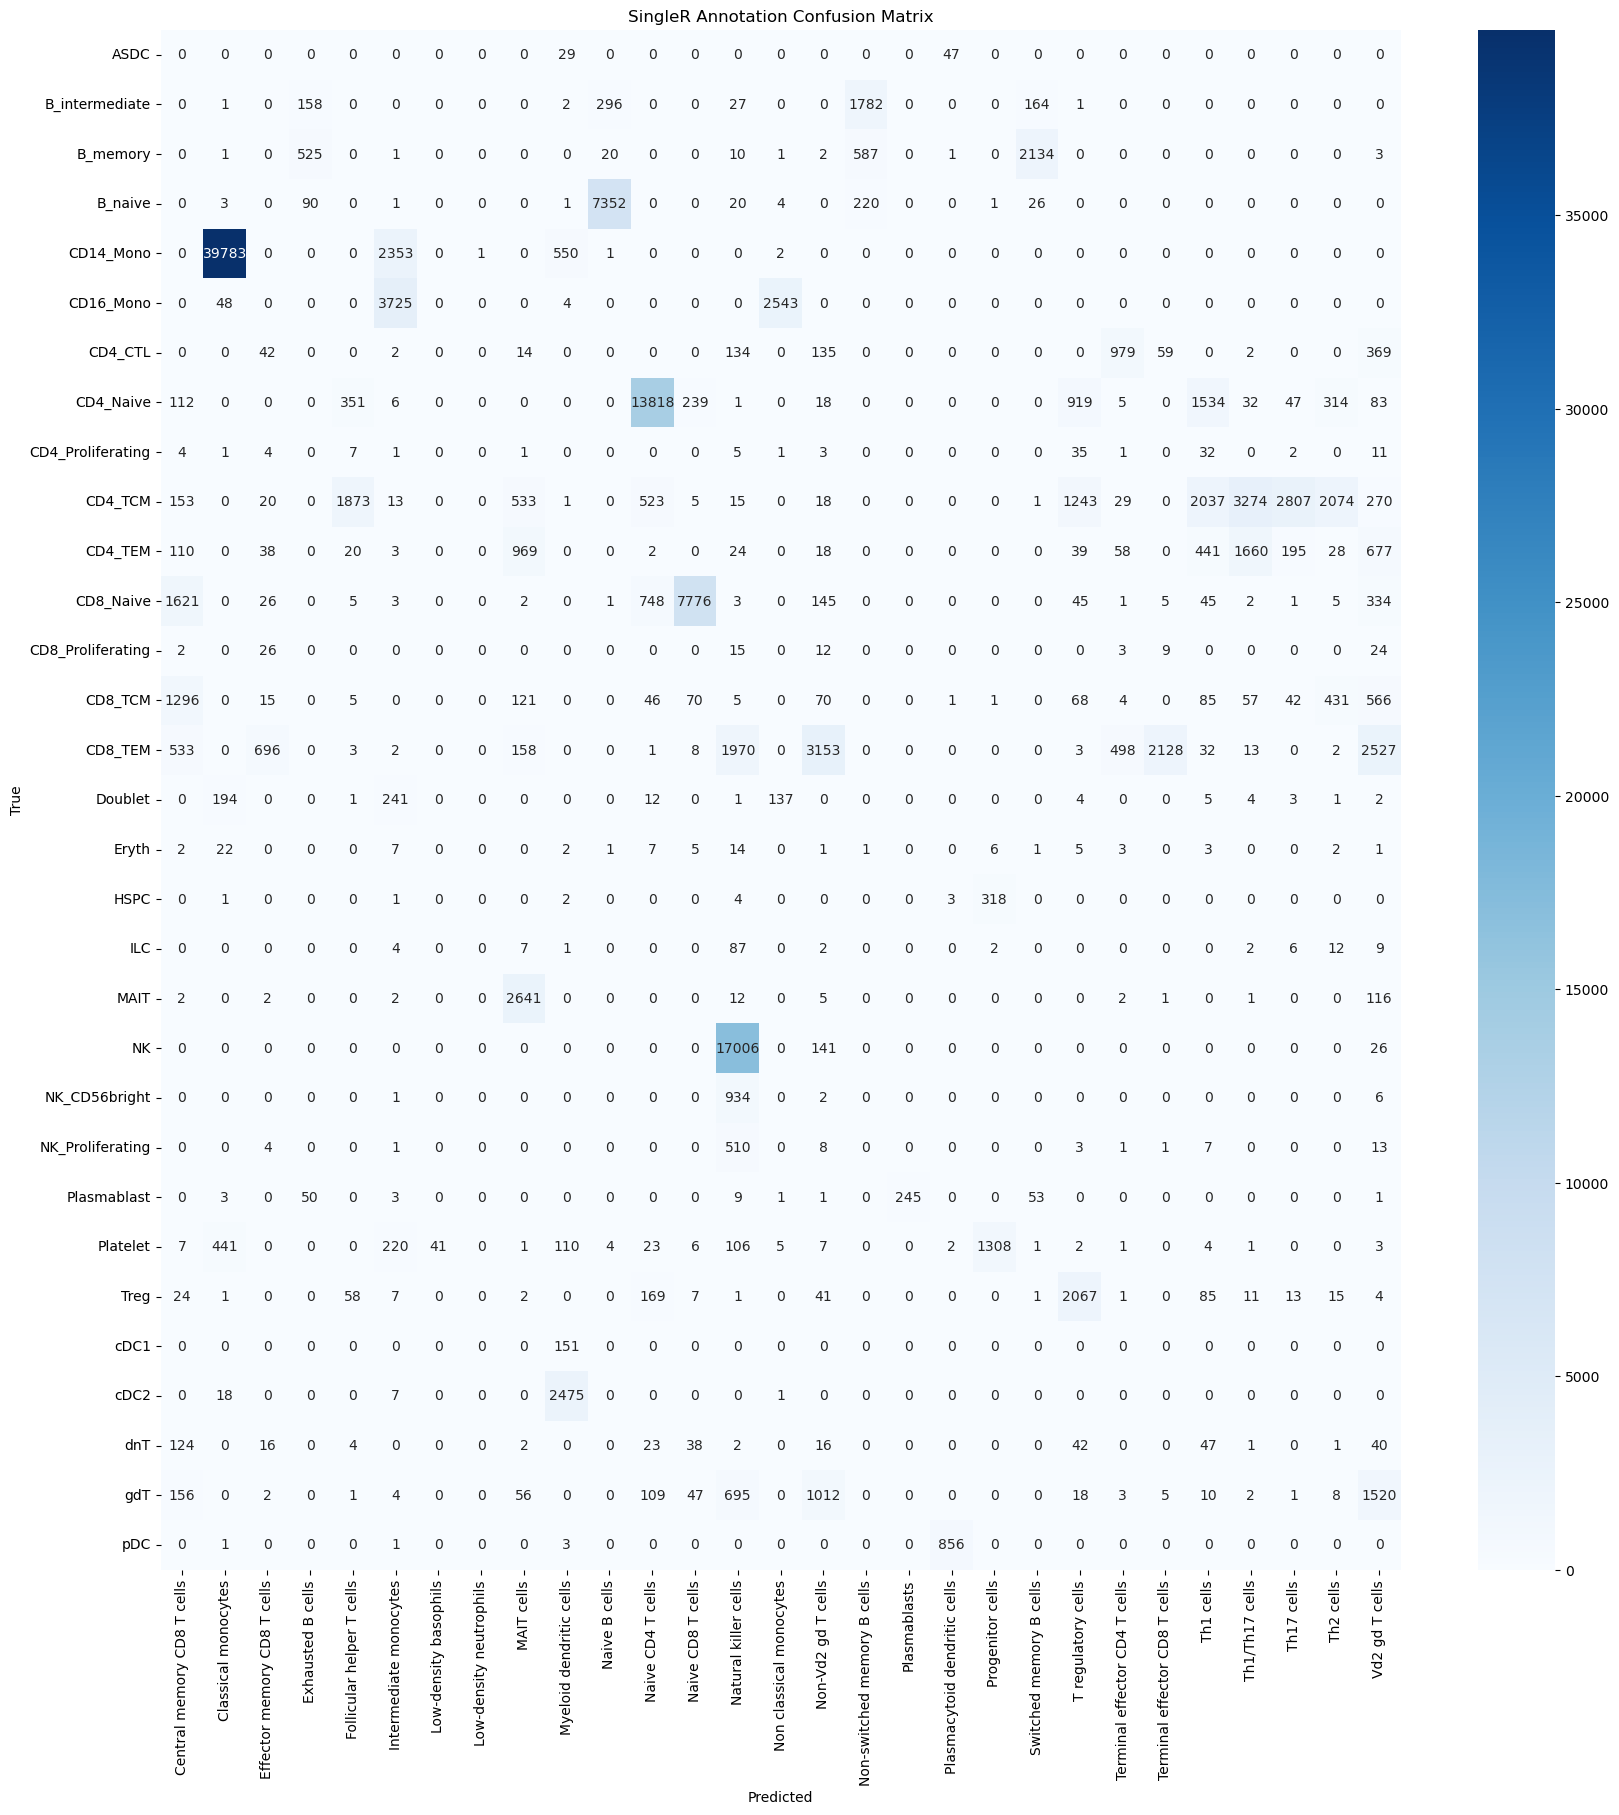

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('SingleR Annotation Confusion Matrix')
plt.show()

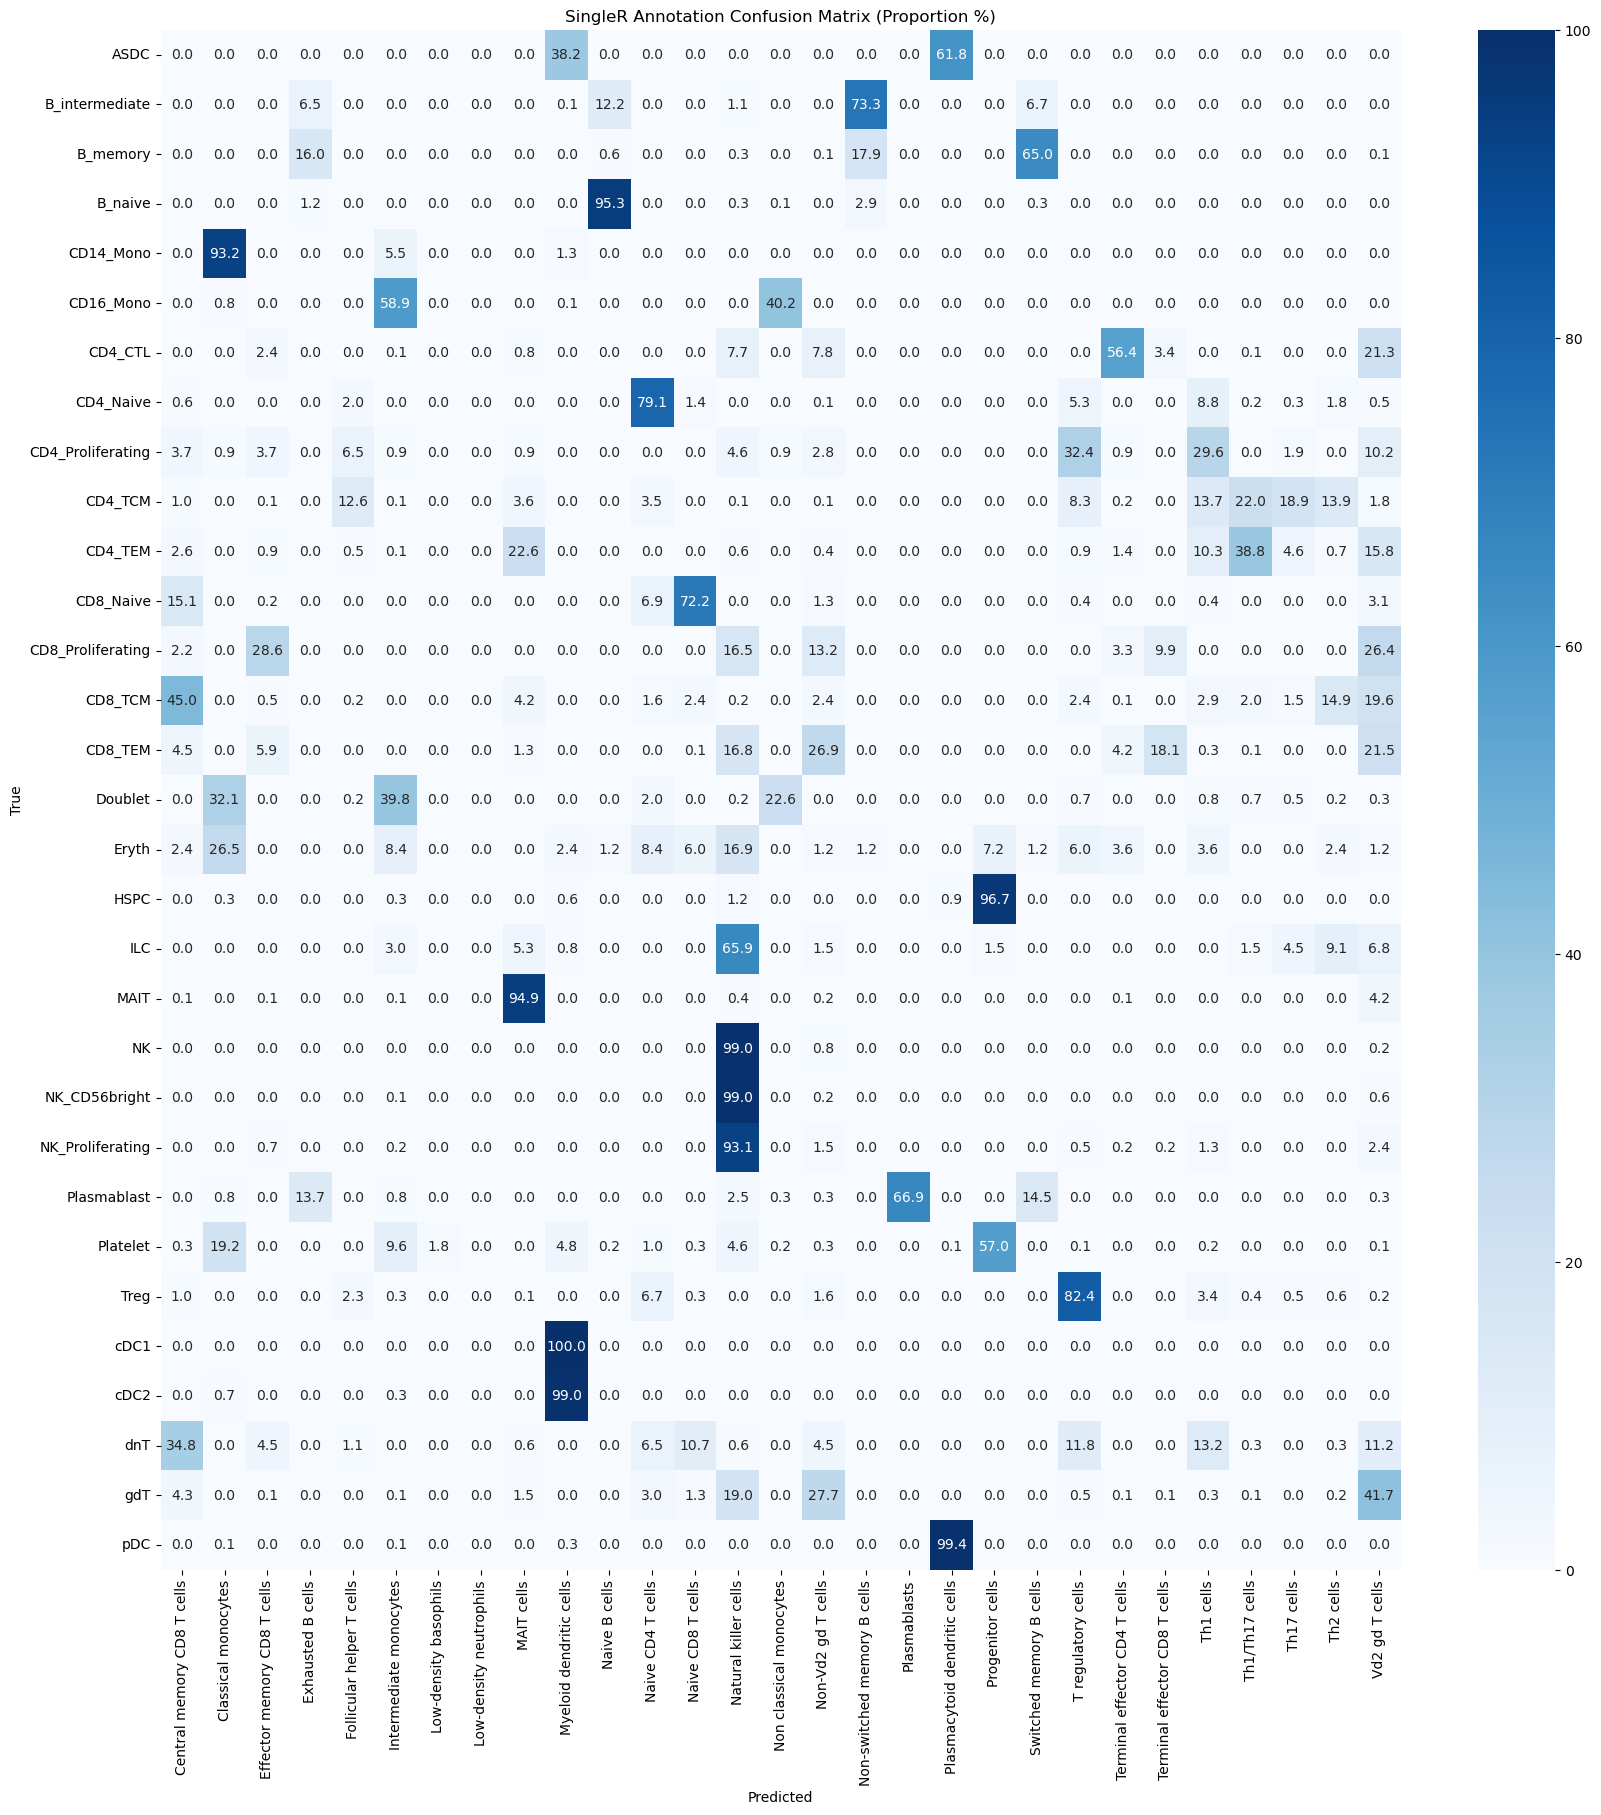

In [21]:
cm_proportion = cm.div(row_sum, axis=0)
cm_proportion *= 100
plt.figure(figsize=(20, 20))
sns.heatmap(cm_proportion, annot=True, cmap='Blues', fmt='.1f')
plt.title('SingleR Annotation Confusion Matrix (Proportion %)')
plt.show()

## Correspondence between Hao_level2 and SingleR labels

In [ ]:
hao_2_singleR = {
    'ASDC': None,
    'B_intermediate': 'Non-switched memory B cells',  #?
    'B_memory': ['Non-switched memory B cells', 'Switched memory B cells'],
    'B_naive': 'Naive B cells',
    'CD14_Mono': 'Classical monocytes',
    'CD16_Mono': ['Non classical monocytes', 'Intermediate monocytes'],
    'CD4_CTL': None,  #?
    'CD4_Naive': 'Naive CD4 T cells',
    'CD4_Proliferating': None,
    'CD4_TCM': None,
    'CD4_TEM': 'Terminal effector CD4 T cells',
    'CD8_Naive': 'Naive CD8 T cells',
    'CD8_Proliferating': None,
    'CD8_TCM': 'Central memory CD8 T cells',
    'CD8_TEM': 'Terminal effector CD8 T cells',
    'Doublet': None,  # technical artifact, not a celltype
    'Eryth': None,  # not PMBC
    'HSPC': 'Progenitor cells',
    'ILC': None,
    'MAIT': 'MAIT cells',
    'NK': 'Natural killer cells',
    'NK_CD56bright': 'Natural killer cells',
    'NK_Proliferating': 'Natural killer cells',
    'Plasmablast': 'Plasmablasts',
    'Platelet': None,
    'Treg': 'T regulatory cells',
    'cDC1': 'Myeloid dendritic cells',
    'cDC2': 'Myeloid dendritic cells',
    'dnT': None,
    'gdT': ['Vd2 gd T cells', 'Non-Vd2 gd T cells'],
    'pDC': 'Plasmacytoid dendritic cells'
}

singleR_2_hao = {
    'Central memory CD8 T cells': 'CD8_TCM',
    'Classical monocytes': 'CD14_Mono',
    'Effector memory CD8 T cells': 'CD8_TEM',
    'Exhausted B cells': None,
    'Follicular helper T cells': None,
    'Intermediate monocytes': 'CD16_Mono',
    'Low-density basophils': None,
    'Low-density neutrophils': None,
    'MAIT cells': 'MAIT',
    'Myeloid dendritic cells': ['cDC1', 'cDC2'],
    'Naive B cells': 'B_naive',
    'Naive CD4 T cells': 'CD4_Naive',
    'Naive CD8 T cells': 'CD8_Naive',
    'Natural killer cells': ['NK', 'NK_CD56bright', 'NK_Proliferating'],
    'Non classical monocytes': 'CD16_Mono',
    'Non-Vd2 gd T cells': 'gdT',
    'Non-switched memory B cells': 'B_memory',
    'Plasmablasts': 'Plasmablast',
    'Plasmacytoid dendritic cells': 'pDC',
    'Progenitor cells': 'HSPC',
    'Switched memory B cells': 'B_memory',
    'T regulatory cells': 'Treg',
    'Terminal effector CD4 T cells': 'CD4_TEM',
    'Terminal effector CD8 T cells': 'CD8_TEM',
    'Th1 cells': None,
    'Th1/Th17 cells': None,
    'Th17 cells': None,
    'Th2 cells': None,
    'Vd2 gd T cells': 'gdT'
}

## Reorder celltypes

In [10]:
ref_celltypes = pd.read_csv('Monaco_ref_celltypes.csv', index_col=0)

In [11]:
# Define the custom order
custom_order = ['B cells', 'CD4+ T cells', 'CD8+ T cells', 'Dendritic cells', 'Monocytes', 'NK cells', 'T cells', 'Basophils', 'Neutrophils', 'Progenitors']

# Reorder the dataframe
ref_celltypes['label.main'] = pd.Categorical(ref_celltypes['label.main'], categories=custom_order, ordered=True)
ref_celltypes = ref_celltypes.sort_values('label.main')

# Print the reordered dataframe
ref_celltypes


,label.main,label.fine
16,B cells,Naive B cells
17,B cells,Non-switched memory B cells
18,B cells,Exhausted B cells
19,B cells,Switched memory B cells
20,B cells,Plasmablasts
8,CD4+ T cells,Follicular helper T cells
9,CD4+ T cells,T regulatory cells
10,CD4+ T cells,Th1 cells
11,CD4+ T cells,Th1/Th17 cells
12,CD4+ T cells,Th17 cells


In [12]:
import json
with open('/Users/evanli/Documents/EvanPys/Progress/PBMC_Hao/Celltype_hierarchy.json') as f:
    Hao_hierarchy = json.load(f)

In [13]:
Hao_hierarchy

{'B': ['B intermediate', 'B memory', 'B naive', 'Plasmablast'],
 'CD4 T': ['CD4 CTL',
  'CD4 Naive',
  'CD4 Proliferating',
  'CD4 TCM',
  'CD4 TEM',
  'Treg'],
 'CD8 T': ['CD8 Naive', 'CD8 Proliferating', 'CD8 TCM', 'CD8 TEM'],
 'DC': ['ASDC', 'cDC1', 'cDC2', 'pDC'],
 'Mono': ['CD14 Mono', 'CD16 Mono'],
 'NK': ['NK', 'NK Proliferating', 'NK_CD56bright'],
 'other': ['Doublet', 'Eryth', 'HSPC', 'ILC', 'Platelet'],
 'other T': ['MAIT', 'dnT', 'gdT']}

In [36]:
Hao_celltype_l1_order = list(Hao_hierarchy.keys())[:-2] + ['other T', 'other']
Hao_celltype_l2_order = []
for l1 in Hao_celltype_l1_order:
    Hao_celltype_l2_order += Hao_hierarchy[l1]
Hao_celltype_l2_order = [x.replace(' ', '_') for x in Hao_celltype_l2_order]

print(Hao_celltype_l1_order)
print(Hao_celltype_l2_order)

['B', 'CD4 T', 'CD8 T', 'DC', 'Mono', 'NK', 'other T', 'other']
['B_intermediate', 'B_memory', 'B_naive', 'Plasmablast', 'CD4_CTL', 'CD4_Naive', 'CD4_Proliferating', 'CD4_TCM', 'CD4_TEM', 'Treg', 'CD8_Naive', 'CD8_Proliferating', 'CD8_TCM', 'CD8_TEM', 'ASDC', 'cDC1', 'cDC2', 'pDC', 'CD14_Mono', 'CD16_Mono', 'NK', 'NK_Proliferating', 'NK_CD56bright', 'MAIT', 'dnT', 'gdT', 'Doublet', 'Eryth', 'HSPC', 'ILC', 'Platelet']


In [38]:
# Reorder columns
cm = cm[ref_celltypes['label.fine']]
cm = cm.reindex(Hao_celltype_l2_order, axis='index')

In [39]:
cm

labels,Naive B cells,Non-switched memory B cells,Exhausted B cells,Switched memory B cells,Plasmablasts,Follicular helper T cells,T regulatory cells,Th1 cells,Th1/Th17 cells,Th17 cells,...,Classical monocytes,Intermediate monocytes,Non classical monocytes,Natural killer cells,Vd2 gd T cells,MAIT cells,Non-Vd2 gd T cells,Low-density basophils,Low-density neutrophils,Progenitor cells
celltype.l2,,,,,,,,,,,,,,,,,,,,,
B_intermediate,296,1782,158,164,0,0,1,0,0,0,...,1,0,0,27,0,0,0,0,0,0
B_memory,20,587,525,2134,0,0,0,0,0,0,...,1,1,1,10,3,0,2,0,0,0
B_naive,7352,220,90,26,0,0,0,0,0,0,...,3,1,4,20,0,0,0,0,0,1
Plasmablast,0,0,50,53,245,0,0,0,0,0,...,3,3,1,9,1,0,1,0,0,0
CD4_CTL,0,0,0,0,0,0,0,0,2,0,...,0,2,0,134,369,14,135,0,0,0
CD4_Naive,0,0,0,0,0,351,919,1534,32,47,...,0,6,0,1,83,0,18,0,0,0
CD4_Proliferating,0,0,0,0,0,7,35,32,0,2,...,1,1,1,5,11,1,3,0,0,0
CD4_TCM,0,0,0,1,0,1873,1243,2037,3274,2807,...,0,13,0,15,270,533,18,0,0,0
CD4_TEM,0,0,0,0,0,20,39,441,1660,195,...,0,3,0,24,677,969,18,0,0,0


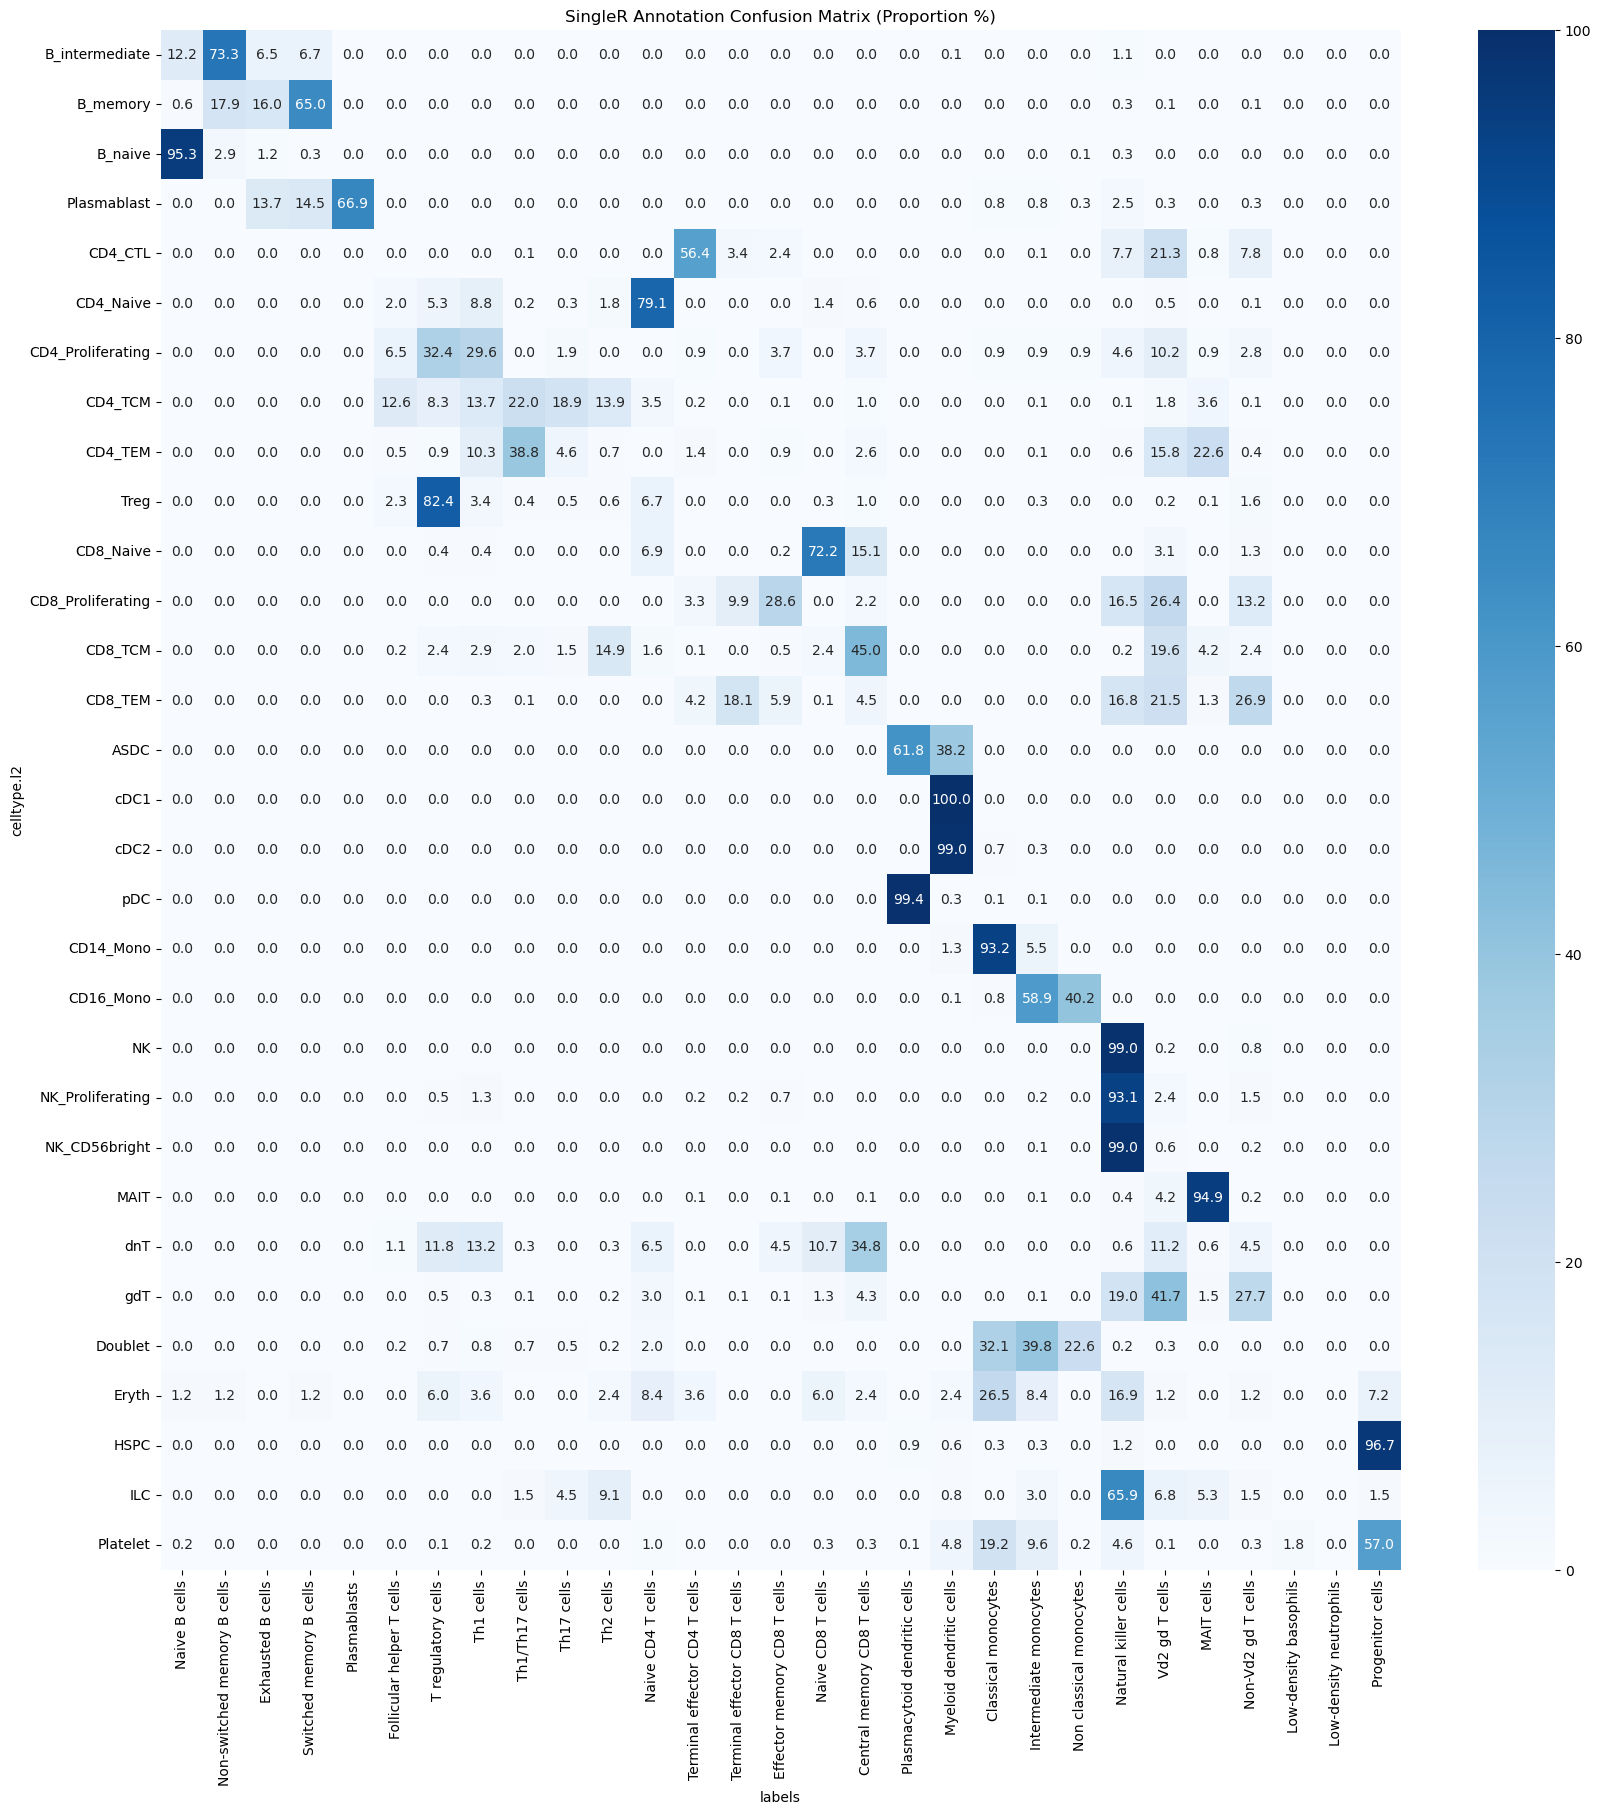

In [41]:
import seaborn as sns

row_sum = cm.sum(axis=1)
cm_proportion = cm.div(row_sum, axis=0)
cm_proportion *= 100
plt.figure(figsize=(20, 20))
sns.heatmap(cm_proportion, annot=True, cmap='Blues', fmt='.1f')
plt.title('SingleR Annotation Confusion Matrix (Proportion %)')
plt.show()

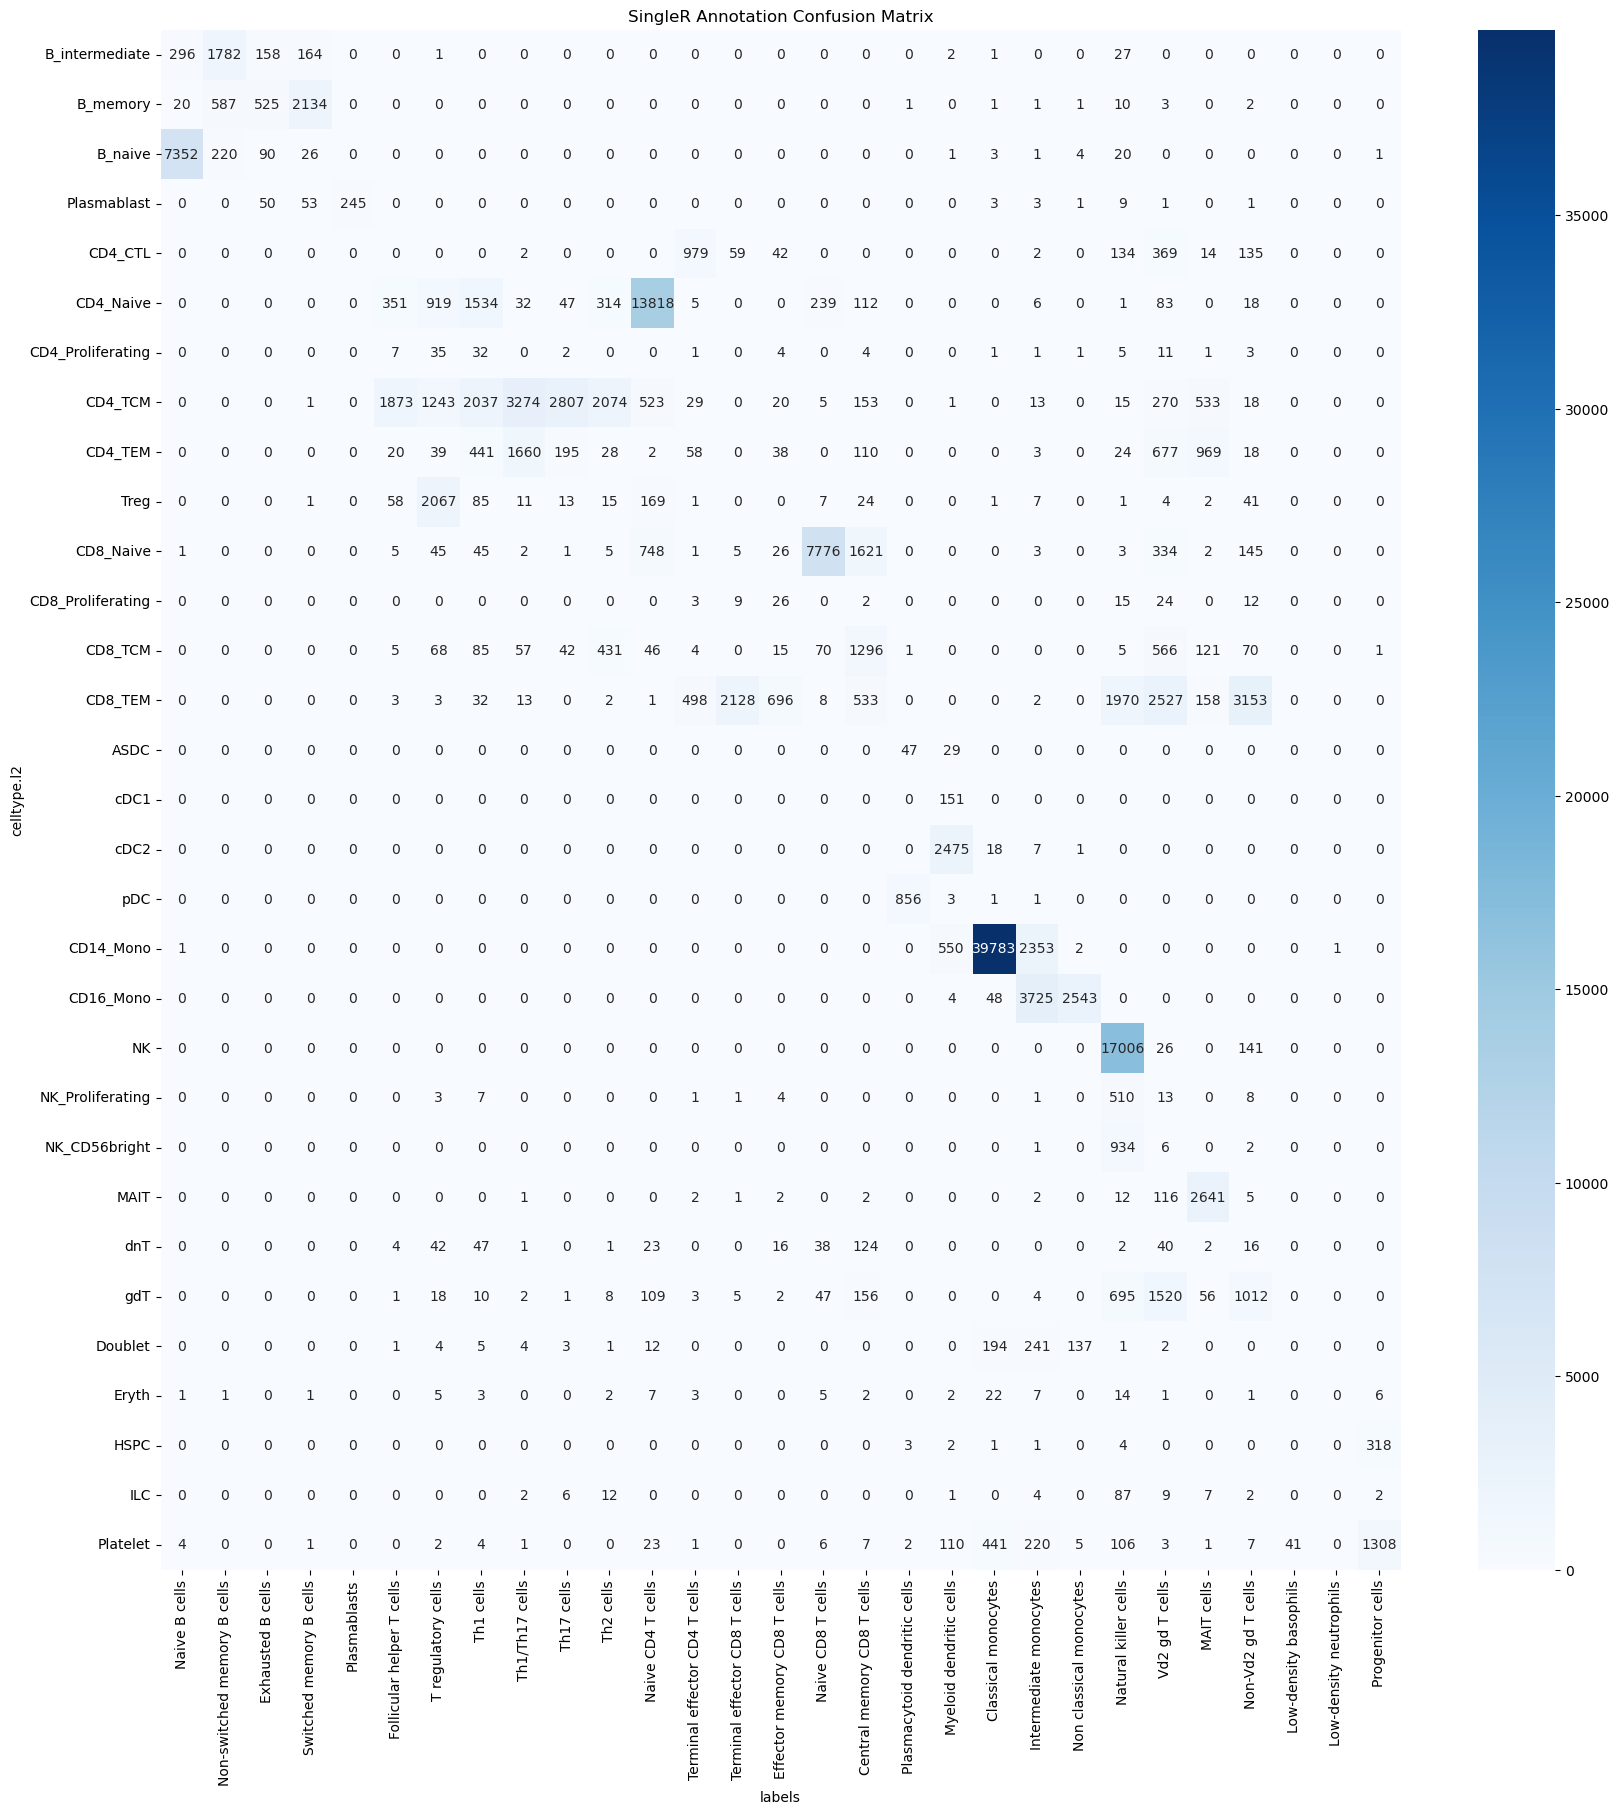

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('SingleR Annotation Confusion Matrix')
plt.show()